### Previous Notebooks & scripts:
1. PRAW
1. minor data cleaning & joining into 1 dataframe/csv

#### This is the 3rd codefile of the project.


In [3]:
#import numpy as np 
    #maybe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#first, read in the "both subreddits joined".csv

mypath = "../data/"
df_both_subs = pd.read_csv(mypath+"both_subs.csv")

In [6]:
df_both_subs.shape

(13106, 7)

In [12]:
df_both_subs.columns
#in which I learn that to_csv writes an index by default, every time
#df.to_csv('file.csv', index=False) should be a future feature
#&/or read in without it for future-other-data-proofing
#either way, I got no time for this:
    #df.drop(columns=['Unnamed: 0.1'], inplace=True)
#another future feature: don't keep the 'subreddit' column either
    #that's beyond redundant and just staying in memory for no good reason


Index(['Unnamed: 0.1', 'Unnamed: 0', 'created_utc', 'title', 'self_text',
       'subreddit', 'is_eli5'],
      dtype='object')

In [ ]:
#5 EDA next
#x TODO Once you have at least 1000 posts from each subreddit
# - you can do some EDA 


#first, though, let's preprocess things & remember lesson 505

In [49]:
##Yep, NLP lesson 2 (mostly)
#I'm just grabbing all lesson 505 imports. No time to be choosy in a timecrunch

# imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
    #that last one is from a chatgpt advice about customizing them

In [13]:
#spam.label.value_counts
df_both_subs.is_eli5.value_counts(normalize=True)

#honestly, I'm just doing the lesson for starters
#(I already "mapped" my which-subreddit column to 0/1 values)

is_eli5
1    0.531512
0    0.468488
Name: proportion, dtype: float64

In [10]:
df_both_subs.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'created_utc', 'title', 'self_text',
       'subreddit', 'is_eli5'],
      dtype='object')

In [11]:
df_both_subs.head()

,Unnamed: 0.1,Unnamed: 0,created_utc,title,self_text,subreddit,is_eli5
0,0,0,1.697390e+09,eli5 could people from the last century compre...,Lets say someone in 1990 plays some Super Mari...,explainlikeimfive,1
1,1,1,1.697390e+09,Eli5 Home EV charging,Don’t know anything about EV charging\n\nWhat ...,explainlikeimfive,1
2,2,2,1.697390e+09,ELI5: why are we potentially able to hold our ...,I understand that it's the lack of oxygen that...,explainlikeimfive,1
3,3,3,1.697389e+09,ELI5: Acquiring my car’s title registration?,"Hey everyone, first time truly posting so bear...",explainlikeimfive,1
4,4,4,1.697389e+09,eli5- engine & cabin air filters,ELI5 - why does the auto mechanic always try t...,explainlikeimfive,1


In [17]:
#next steps in lesson 505

#bad code, but it might be nice to actually use 2 variables for modeling
#another fun future-feature from the Procrastinating Student
#X = df_both_subs['self_text', 'title']

X = df_both_subs['title'] 
    #to avoid data leakage
    #leave out the "whether it's in that subreddit"
y = df_both_subs['is_eli5']

y.mean()

0.5315122844498703

In [ ]:
#I think this means that 53% of my pulled-posts are from /r/eli5
#also something about a baseline model

In [19]:
#unnecessary attrib: I copy-pasted most of this from lesson 505
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)
# Instantiate a CountVectorizer.
cvec = CountVectorizer()
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

# Transform the corpus.
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

#however, due to my incomplete work on previous projects
#I have no idea what "transform does", on a theoretical level
#matrices are involved, I can tell you that much:
X_train


<9829x6314 sparse matrix of type '<class 'numpy.int64'>'
	with 104220 stored elements in Compressed Sparse Row format>

In [27]:
X_train.todense() #make matrix
#why. what am matrix.


print("X_train.shape: ", X_train.shape)
print("which is: ",X_train.shape[0]*X_train.shape[1],", a lot of dang matrix cells")

#1 col per token (word) in vocab (reddit post titles) == 6314 columns
#wide vocab, but DOES include stop words afaik

X_train.shape:  (9829, 6314)
which is:  62060306 , a lot of dang matrix cells


In [28]:
1 - 104220 /(9829*6314)
#in which I should know something about matrices and their sparseness I guess


0.9983206657086093

In [29]:
#Per Tim in lesson: 
#remember that sklearn never outputs df, so we've lost the column names
#can get the col names (words in corpus) back:

#not saving, just annotating that here:
cvec.get_feature_names_out() #column names tokens back
    #solutions notebook had a slice here, to display more useful ones

array(['00', '000', '0c', ..., 'zones', 'zoom', 'étale'], dtype=object)

In [30]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling
        #which is a pity
#but I gotta do some EDA on it for a minute

X_train_df = pd.DataFrame(X_train.todense(), columns = cvec.get_feature_names_out())
import sys
sys.getsizeof(X_train_df) / 1024 / 1024

#is this a 473 megabyte DF? wow.

473.48271560668945

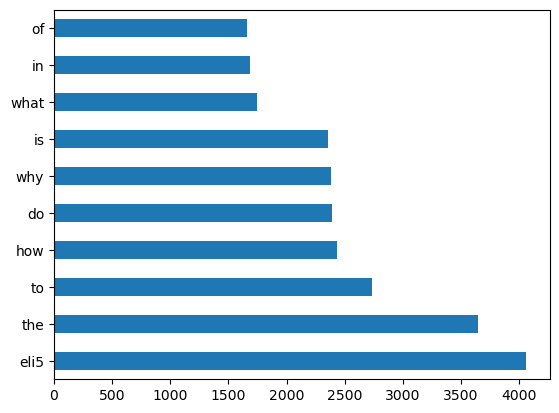

In [33]:
#get the top 10 words
#plot a bar chart
#they are all stop words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.savefig('../images/top-10-is-stoppers.png')

In [ ]:
#it's actually interesting that one of the subreddit names itself in the title so much
#that it lands in the "both of them" top-10

In [ ]:
#okay so what about 
## Plot top occuring words
#without stop words

#recall # Let's look at sklearn's stopwords.
#print(CountVectorizer(stop_words = 'english').get_stop_words())

In [38]:
#let's redo & overwrite the test/train stuff 
#to get going w/o stop-wodrs

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)
# Instantiate (w/ Stop Words)
cvec = CountVectorizer(stop_words='english')

#fit
cvec.fit(X_train)

#transform
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df = pd.DataFrame(X_train_cv.todense(),columns=cvec.get_feature_names_out())


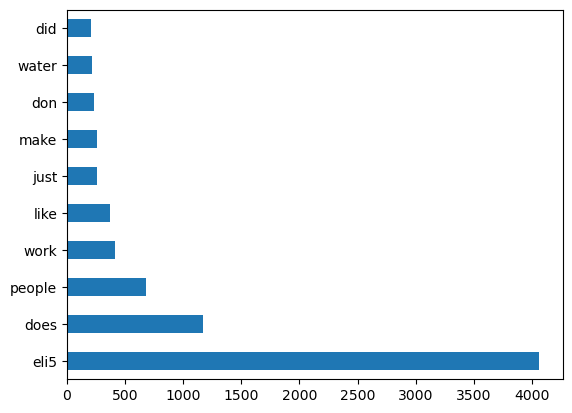

In [47]:
# Plot top occuring words, without regular english stop words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.savefig('../images/top-10-without-stoppers.png')

In [41]:
#note that "did, don, does" are all now in the top 10 although "do" isn't anymore

In [59]:
#attrib chatgpt:
custom_stop_words = set([
    "eli5",
    "did",
    "don",
    "does"
    # Add more custom stop words here
])


custom_stop_words
#this might become useful next time I instantiate a cvec
#if I could correctly add this to 'english'

{'did', 'does', 'don', 'eli5'}

In [53]:
#can't do this yet:
# # # Plot top occuring words
# X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
# plt.savefig('../images/top-10-without-custom-stoppers.png')

In [ ]:
#recall:
# One downside to CountVectorizer is the size of its vocabulary (cvec.get_feature_names()) can get really large. We're creating one column for every unique token in your corpus of data!
# There are three hyperparameters to help you control this.

#also n-grams are going to be important

#it's time to redo this again

In [71]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)
# Instantiate (w/ ngrams)
cvec = CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=2
                      )
#Fit
cvec.fit(X_train)

#Transform
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [78]:
#this is my last attempt to add to the stop word list

# Combine the default English stop words with your custom stop words
combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words)

# Update the stop words in the CountVectorizer
cvec.stop_words = combined_stop_words
#pretty sure this cell is more or less entirely in the wrong place
#also broken


In [79]:
X_train_cv.shape

(9829, 11549)

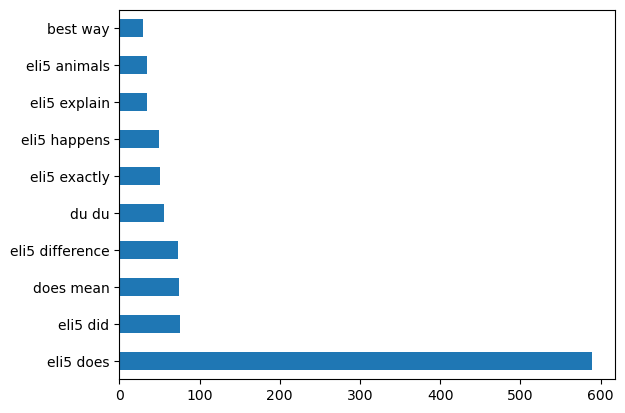

In [81]:
X_train_df = pd.DataFrame(X_train_cv.todense(),columns=cvec.get_feature_names_out())

X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.savefig('../images/top-10-bigrams.png')

In [82]:
#note that custom stopwords failed
#again, eli5 must be a standard way of starting the title

In [ ]:
#future (porfolio) feature: all of the above EDA but with self_text!!!


In [ ]:
#Welp, that's all I have time for.
#it occurs to me that it's good I can type fast
#also that I might not leave that in if I had more sleep.


#Next up: Modelling

In [83]:
#We may want to test lots of different values of hyperparameters in our CountVectorizer.
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [85]:
#We need to calculate baseline accuracy in order to tell if our model is better than null model ("predicting the plurality class").
print("Baseline accuracy is bad: ",1- y_test.mean())

Baseline accuracy is bad:  0.45712541959108943


In [86]:
y_test.value_counts(normalize = True)

is_eli5
1    0.542875
0    0.457125
Name: proportion, dtype: float64

In [89]:

# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe = Pipeline([
    ('cvec',CountVectorizer()), #stopwords? #ngrams?
    ('nb',MultinomialNB())
])

#I feel like I could add my own stopwords here after all
####not did in class I guess# Maximum number of features fit: 2000, 3000, 4000, 5000
###### Maximum number of documents needed to include token: 90%, 95%

# Search over the following values of hyperparameters:
# Minimum number of documents needed to include token: 2, 3
# Check (individual tokens) and also check (individual tokens and 2-grams).
pgrid = {
    'cvec__stop_words':[None, 'english'], 
    'cvec__min_df': [1,2,3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__binary': [False, True]
}


# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, pgrid, cv=10)

In [90]:
%%time
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

CPU times: user 40.9 s, sys: 932 ms, total: 41.9 s
Wall time: 43.9 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__binary': [False, True],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [91]:
# Best Params? 
gs.best_params_

{'cvec__binary': True,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [92]:
# Score model on training set.
gs.score(X_train, y_train)

0.8769966425882593

In [93]:
# Score model on testing set.
gs.score(X_test,y_test)


0.8507781507476351

In [ ]:
#these are way better than the <50% I seem to have gotten from the baseline

In [94]:
# Get predictions
preds = gs.predict(X_test)


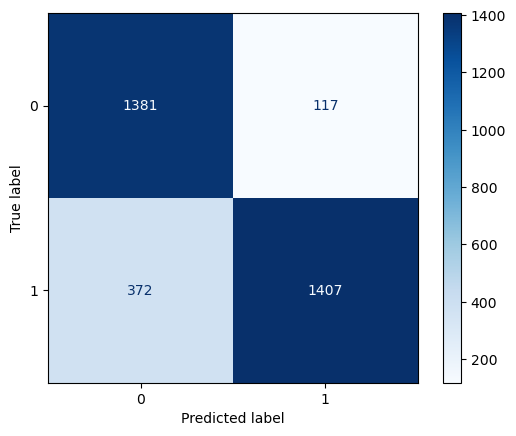

In [101]:
# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues');
plt.savefig('../images/confusion_matrix.png')

#attrib the hot dog here, so i can grep it for the ppt
#attrib https://blog.nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/

In [102]:
#from lesson 505 solutions
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, digits = 5))


              precision    recall  f1-score   support

           0    0.78779   0.92190   0.84958      1498
           1    0.92323   0.79089   0.85195      1779

    accuracy                        0.85078      3277
   macro avg    0.85551   0.85639   0.85077      3277
weighted avg    0.86132   0.85078   0.85087      3277



In [103]:
# #delete this eventually it goes in ppt/readme notes:
#obvy from chatgpt

# #In the classification report you've provided, here's what each part means in plain English:

# Precision: For class 0, the model's precision is approximately 0.79. This means that when the model predicts class 0, it's correct about 79% of the time. For class 1, the model's precision is approximately 0.92, indicating it's correct about 92% of the time when predicting class 1.
# Recall (Sensitivity): For class 0, the model's recall is approximately 0.92. This means that out of all the actual instances of class 0, the model can correctly find about 92% of them. For class 1, the model's recall is approximately 0.79, indicating it can capture about 79% of the actual instances of class 1.
# F1-Score: The F1-score combines precision and recall into a single number. For class 0, it's approximately 0.85, and for class 1, it's also around 0.85. The F1-score is a balance between precision and recall, so in this case, both classes have similar F1-scores.
# Support: Support tells you how many data points belong to each class in your dataset. For class 0, there are 1498 instances, and for class 1, there are 1779 instances.

# Accuracy: The overall accuracy of your model is approximately 0.85, which means it's correct about 85% of the time when classifying all instances.
# Macro Average: The macro average is the average of precision, recall, and F1-score across all classes. In this case, it's approximately 0.86.
# Weighted Average: The weighted average is similar to the macro average but takes into account the support for each class. It's around 0.85 in this report

In [ ]:
#btw not doing tfdif (sp), bc time.
#if salaried for EDA, sure thing!

In [ ]:

#5.2 future EDA &/or features: look for patterns btwn the subreddits
    #compare the most-common from each
#which would require I read_csv the individual subreddits
#or at least make an X that's each one (use the is_eli5 binary column)
    #least-common?
    #length of title?
    #length of post?
    
    #can't do, didn't pull, but thoughts for future EDA: 
        #any particular usernames repeated?
   